In [34]:
from matplotlib import pyplot as plt
from common import *
plt.style.use("dark_background")

# dX/dt = A @ X + f(t)
A = np.array(
    [[-3,1,3],
     [2,-2,-9],
     [-5,2,5]]
)
# initial condition
x0 = np.array([-1,1,2])

# inhomogeneous part
def f_t(t):
    return sp.Matrix([sp.sin(t)*t,t*t,sp.exp(-t+1)/(t+1)]) 
diff = InhomogeneousLinearDifferentialEquation(A,f_t,0,x0)

# time intervals
t_span = [0,10]
t = np.linspace(t_span[0],t_span[1],1000)

Failed to build analytic integral of exp(1 - t)/(t + 1)
Only definite integrals are supported
will use approximate integration


Text(0.5, 1.0, 'Analytic')

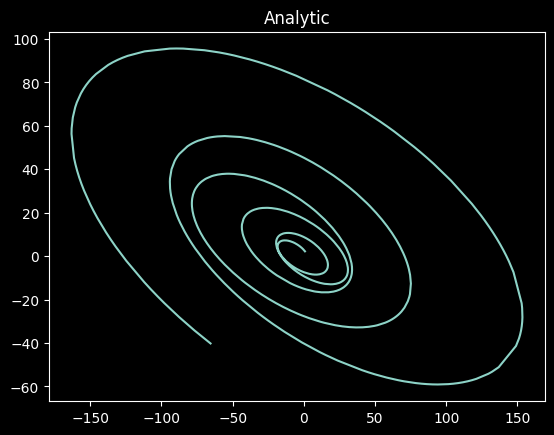

In [ ]:
# to prove you that this solution is independent on passed t value
# we will pass shuffled t values
t_shuffle = np.random.choice(len(t),len(t))
values_analytic = diff.analytic_solution(t[t_shuffle])[np.argsort(t_shuffle)].real
plt.plot(
    values_analytic[:,1],
    values_analytic[:,2],
)
plt.title("Analytic")

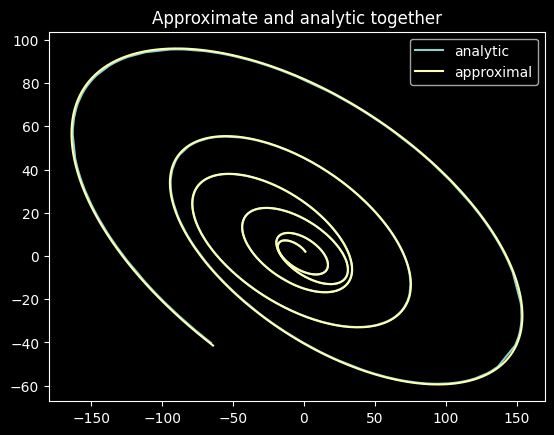

In [36]:
from scipy.integrate import solve_ivp
def deriv(t,x):
    return A @ x + diff.f_t(t)


# time intervals
t_span = [0,10]
t = np.linspace(t_span[0],t_span[1],1000)

values_approx = solve_ivp(deriv,t_span=t_span,y0=x0,t_eval=t).y.T

plt.plot(
    values_analytic[:,1],
    values_analytic[:,2],
    label="analytic"
)
plt.plot(
    values_approx[:,1], 
    values_approx[:,2],
    label="approximal"
)
plt.title("Approximate and analytic together")
plt.legend()